## DataFrame 選取元素方法
 import pandas as pd

 df_Pclass = pd.DataFrame(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())


 - ### df 選取行(欄)資料

 df_Pclass["Pclass"]

 df_Pclass.Pclass

 df_Pclass["Survived"]




 - ### df slice僅支援列資料

 df_Pclass[0:3:2]

 row 0 to row 3 , step = 2 rows




- ### ----- df原生[ ]方法選取row +  .loc方法選取column -----

 ### * Tips : 可以透過 df原生[ ]方法選取row +  .loc方法選取column

 df_Pclass.loc[0:2, ["Pclass"]]

 df_Pclass.loc[0:2, ["Survived"]]


## DataFrame 排序方法

 - features = pd.DataFrame()

 features['feature'] = train.columns

 features['importance'] = clf.feature_importances_

- import pandas as pd

 features.sort_values(['importance'],ascending=False)    
 - 現在 DataFrame 不給 .sort ， 要改下 .sort_values

# 分類問題 - 處理流程

 步驟	   內容

第一步	  暸解資料外觀與內容

第二步	  資料預處理 (Feature Engineering)

第三步	  分類器

第四步	  預測、模型評估

第五步	  應用預測資料

第六步	  上傳

#### 第七步   調整方向 :

##### 1. 分類 Model       : SVM , RF , LR , ...

##### 2. 參數 Parameter   : lambda(alpha) , n_estimators , gamma , ...

##### 3. 變數 Features    : meaningful features    (多數時間都在feature engineering : 填補遺漏值 、 dummy variables)
 

 

 
  

## Kaggle - Titanic 大綱

# 第一次上傳

## 第一步   暸解train data的資料外觀與內容

 - df = pd.read_csv() : 讀取資料
 
 - train.head() : 了解資料的大概情況，不要用print()會比較完整而且好看
 
 - train.shape : 資料維度
 
 - train.dtypes : 每一筆資料的儲存狀態(是integer, float, object等等)
 
 - train.info()
 
 - train.isnull().sum() : 一口氣了解有多少遺漏值
 
用計算幾個來衡量不太準，應該用比例來衡量(不然萬一樣本數本來就不同，直接計數去比較很容易誤判 -> 用normalize = True來改用比例去衡量)

bar_plotting()

## 第二步	  train data的資料預處理 (Feature Engineering)
 - X 不要納入編號（PassengerId, Ticket）、姓名（Name）與遺漏值過多的變數（Cabin）
 - 填補遺漏值                            : Embarked, Age
 - one-hot encoding 進行類別標籤編碼轉換  : Sex, Embarked
 
 train_sex_embarked_dummies = pd.get_dummies(train.loc[:, ["Sex", "Embarked"]])

 train_sex_embarked_ohe = train_sex_embarked_dummies.values.astype(float)

 透過.values先換成ndarray。為什麼要轉換過來呢?因為等等要資料水平合併、透過ndarray跑計算阿

 train_sex_embarked_dummies.head()

## 第三步	  分類器、模型h(x)的評估

這裡採用 : 決策樹分類器

from sklearn import tree


 - 整理 features 跟 target

 train_features = np.hstack((train.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare"]].values, train_sex_embarked_ohe))

 target = train.Survived.values


 - 建立模型

 tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 87)

 tree_clf.fit(train_features, target)


 - 預測、模型評估

 print(tree_clf.feature_importances_)

 print(tree_clf.score(train_features, target))

## 第四步	  整理test data


#### 對於test data也要做和train data一樣的事情 : 

1- 了解資料外觀

 - pd.read_csv()讀取test data
 - test.head()了解外觀
 - test.shape / test.dtypes 了解test data的大概樣貌
 - test.isnull().sum()看test data 有沒有遺漏值，有的話等等預處理就來填補遺漏值


2- 資料預處理

 (1) 填補遺漏值


* Age 的遺漏值以中位數填補

 age_median = test.Age.median()

 test.Age = test.Age.fillna(age_median)

 print(sum(test.Age.isnull()))               -> 確認填補完的那一變數欄位還有沒有遺漏值 





* Fare 的遺漏值以平均數填補

 fare_median = test.Fare.median()

 test.Fare = test.Fare.fillna(fare_median)

 print(sum(test.Fare.isnull()))              -> 確認填補完的那一變數欄位還有沒有遺漏值





(2) one hot encoding 進行類別標籤編碼轉換

  - test_sex_embarked_dummies = pd.get_dummies(test.loc[:, ["Sex", "Embarked"]])

   test_sex_embarked_ohe = test_sex_embarked_dummies.values.astype(float)

   test_sex_embarked_dummies.head()

## 第五步	  應用預測資料
 - 整理 test_features
 
 test_features = np.hstack((test.loc[:, ["Pclass", "Age", "SibSp", "Parch", "Fare"]].values, test_sex_embarked_ohe))




 - 預估
 
 predictions = tree_clf.predict(test_features)
 
 print(predictions)

## 第六步	  上傳
 
 - 參考 Submission File Format 整理一下上傳檔案

 PassengerId =np.array(test["PassengerId"]).astype(int)
 
 my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
 
 print(my_solution.head())
 
 print(my_solution.shape)
 
 my_solution.to_csv("my_first_solution.csv", index_label = ["PassengerId"])

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt; plt.rcdefaults()

%matplotlib inline
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## 第一步 暸解train data的資料外觀與內容  (*I - Exploratory data analysis*)

In [123]:
train = pd.read_csv("https://storage.googleapis.com/py_ml_datasets/train.csv")  #讀取資料 (是DataFrame)

In [124]:
train.head()         #用.head()了解資料的大概情況，不要用print()會比較完整而且好看

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
train.shape    #train.shape : 資料維度

(891, 12)

In [126]:
train.dtypes   #train.dtypes : 每一筆資料的儲存狀態(是integer, float, object等等)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [128]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
print("train.isnull() : 判斷是不是遺漏值，搭配.sum()一口氣了解有多少遺漏值")
train.isnull().sum()

train.isnull() : 判斷是不是遺漏值，搭配.sum()一口氣了解有多少遺漏值


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## I - Exploratory data analysis

Feature 1 : PassengerId

Feature 2 : Survived (欲預測變數)

Feature 3 : Pclass

Feature 4 : Name

Feature 5 : Sex

Feature 6 : Age

Feature 7 : SibSp

Feature 8 : Parch

Feature 9 : Ticket

Feature 10 : Fare

Feature 11 : Cabin (遺漏值過多)

Feature 12 : Embarked

# Feature 1 : PassengerId

# Feature 2 : Survived (欲預測變數)

# Feature 3 : Pclass

# Feature 4 : Name

# Feature 5 : Sex

# Feature 6 : Age

# Feature 7 : SibSp

# Feature 8 : Parch

# Feature 9 : Ticket

# Feature 10 : Fare

# Feature 11 : Cabin (遺漏值過多)

# Feature 12 : Embarked

# Feature 6 : Age x Feature 10 : Fare

# Feature 3 : Pclass x Feature 10 : Fare

# 第二步 train data的資料預處理 (*II - Feature engineering*)

### 1. 初步決定捨棄哪些變數、由哪些變數再衍生出新變數

### 2. 填補遺漏值

In [131]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 填補 Feature 12 : Embarked 的遺漏值

In [132]:
# Embarked 的遺漏值都以 眾數 "S" 填補
print(train.Embarked.value_counts())
print("\n")

print("查看Embarked遺漏值有 %s 個" % (sum(train.Embarked.isnull())))
most_embarked = train.Embarked.value_counts().index[0]
train.Embarked = train.Embarked.fillna(most_embarked)
print("\n")

print("經過剛剛填補遺漏值之後，Embarked遺漏值還有 %s 個" % (sum(train.Embarked.isnull())))

S    644
C    168
Q     77
Name: Embarked, dtype: int64


查看Embarked遺漏值有 2 個


經過剛剛填補遺漏值之後，Embarked遺漏值還有 0 個


- 填補 Feature 6 : Age 的遺漏值

In [133]:
# Age 的遺漏值以中位數填補 : 經過資料變數探索，決定分組，以各組中位數來填補遺漏值
print(train.Age.value_counts())
print("\n")

print("查看Age遺漏值有 %s 個" % (sum(train.Age.isnull())))

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64


查看Age遺漏值有 177 個


In [134]:
# 分組準備

def get_titles():

    global train
    
    # we extract the title from each name
    train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    # 'Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir' -> 'Mr'
    # 'the Countess', 'Mme', 'Lady', 'Dona' -> 'Mrs'
    # 'Mlle', 'Ms' -> 'Miss'
    
    Title_Dictionary = {
                        "Capt":       "Mr",
                        "Col":        "Mr",
                        "Major":      "Mr",
                        "Jonkheer":   "Mr",
                        "Don":        "Mr",
                        "Sir" :       "Mr",
                        "Dr":         "Officer",
                        "Rev":        "Mr",
                        "the Countess":"Mrs",
                        "Dona":       "Mrs",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Mrs"

                        }
    
    # we map each title
    train['Title'] = train.Title.map(Title_Dictionary)

get_titles()

In [135]:
grouped_sex_pclass_title = train.groupby(['Sex','Pclass','Title'])
grouped_sex_pclass_title.median()

PassengerId  Survived   Age  SibSp  Parch       Fare
Sex    Pclass Title                                                        
female 1      Miss           369.0       1.0  30.0    0.0    0.0   88.25000
              Mrs            514.0       1.0  40.0    1.0    0.0   79.20000
              Officer        797.0       1.0  49.0    0.0    0.0   25.92920
       2      Miss           437.5       1.0  24.0    0.0    0.0   13.00000
              Mrs            439.5       1.0  31.5    1.0    0.0   26.00000
       3      Miss           372.0       0.5  18.0    0.0    0.0    8.75625
              Mrs            405.5       0.5  31.0    1.0    1.0   15.97500
male   1      Master         446.0       1.0   4.0    1.0    2.0  120.00000
              Mr             476.0       0.0  42.0    0.0    0.0   38.50000
              Officer        647.0       0.5  44.0    1.0    0.0   64.80000
       2      Master         408.0       1.0   1.0    1.0    1.0   26.00000
              Mr             440.0       0.0  31.0    0.0    0.0   13.00000
              Officer        358.5       0.0  38.5    0.0    0.0   12.25000
       3      Master         270.5       0.0   4.0    3.5    1.0   28.51250
              Mr             472.0       0.0  26.0    0.0    0.0    7.89580

In [136]:
# Age 的遺漏值以中位數填補
age_median = train.Age.median()
train.Age = train.Age.fillna(age_median)

In [137]:
print("經過剛剛填補遺漏值之後，Age遺漏值還有 %s 個" % sum(train.Age.isnull()))

經過剛剛填補遺漏值之後，Age遺漏值還有 0 個


### 3.   新增變數
- train_copied = train.copy()

In [138]:
train_copied = train.copy()

In [139]:
# 3-1. 將 SibSp 與 Parch 相加再加 1（自己）成為 family_size ， 只留下新衍生出的變數
train_copied["family_size"] = train_copied["SibSp"] + train_copied["Parch"] + 1

train_copied.drop('SibSp', axis = 1, inplace = True)
train_copied.drop('Parch', axis = 1, inplace = True)

In [140]:
# 3-2. 衍生出新變數Title

def process_names():
    
    global train_copied
    
    # encoding in dummy variable
    train_titles_dummies = pd.get_dummies(train_copied['Title'], prefix = 'Title') # prefix 即 column name
    train_copied = pd.concat([train_copied, train_titles_dummies], axis = 1)
    
    # removing the title variable
    train_copied.drop('Title', axis = 1, inplace = True)

process_names()

In [141]:
# 3-3. 捨棄變數 Cabin (遺漏值過多)
train_copied.drop('Cabin', axis = 1, inplace = True)

- 確認填補遺漏值之後的進度， 同時了解目前共有(創造/捨棄)幾個變數、變數儲存型態

In [142]:
train_copied.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Fare             0
Embarked         0
family_size      0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
dtype: int64

In [143]:
train_copied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
Ticket           891 non-null object
Fare             891 non-null float64
Embarked         891 non-null object
family_size      891 non-null int64
Title_Master     891 non-null uint8
Title_Miss       891 non-null uint8
Title_Mr         891 non-null uint8
Title_Mrs        891 non-null uint8
Title_Officer    891 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(5)
memory usage: 60.1+ KB


### 4. 類別標籤編碼轉換（使用 One-hot encoding） : 欲保留且為object的變數 - Sex, Embarked, Ticket

 - 使用 one-hot encoding 進行類別標籤編碼轉換

In [144]:
# 3-2. 由 One-hot encoding 衍生出新變數 ， 捨棄資料儲存型態仍為 object 的變數

def process_other_one_hot_encoding():
    
    global train_copied
    # we clean the Name variable
    train_copied.drop('Name', axis = 1, inplace = True)
    
    
    # encoding in dummy variable
    train_copied_sex_embarked_dummies = pd.get_dummies(train_copied.loc[:, ["Sex", "Embarked"]]) # prefix 即 column name
    
    # 合併新增且整理過變數的DataFrame
    train_copied =  pd.concat([train_copied, train_copied_sex_embarked_dummies], axis = 1)
    
    
    # removing the "object" variable
    train_copied.drop('Sex', axis = 1, inplace = True)
    train_copied.drop('Embarked', axis = 1, inplace = True)
    train_copied.drop('Ticket', axis = 1, inplace = True)

process_other_one_hot_encoding()



def process_pclass():
    
    global train_copied
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(train_copied['Pclass'],prefix="Pclass")
    
    # adding dummy variables
    train_copied = pd.concat([train_copied,pclass_dummies],axis=1)
    
    # removing "Pclass"
    
    train_copied.drop('Pclass',axis=1,inplace=True)
    
    
process_pclass()

In [145]:
train_copied.drop('Survived', axis = 1, inplace = True)

- feature selection

In [146]:
train_copied

,PassengerId,Age,Fare,family_size,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,7.2500,2,0,0,1,0,0,0,1,0,0,1,0,0,1
1,2,38.0,71.2833,2,0,0,0,1,0,1,0,1,0,0,1,0,0
2,3,26.0,7.9250,1,0,1,0,0,0,1,0,0,0,1,0,0,1
3,4,35.0,53.1000,2,0,0,0,1,0,1,0,0,0,1,1,0,0
4,5,35.0,8.0500,1,0,0,1,0,0,0,1,0,0,1,0,0,1
5,6,28.0,8.4583,1,0,0,1,0,0,0,1,0,1,0,0,0,1
6,7,54.0,51.8625,1,0,0,1,0,0,0,1,0,0,1,1,0,0
7,8,2.0,21.0750,5,1,0,0,0,0,0,1,0,0,1,0,0,1
8,9,27.0,11.1333,3,0,0,0,1,0,1,0,0,0,1,0,0,1
9,10,14.0,30.0708,2,0,0,0,1,0,1,0,1,0,0,0,1,0


### 5. 整理 features, target，用.values把Dataframe轉成ndarray，因為等等要跑計算

In [147]:
trainning_features_X = train_copied.values
trainning_target_Y = train.Survived.values
print("trainning_features_X : \n%s" % trainning_features_X[ 0 , :])

trainning_features_X : 
[  1.    22.     7.25   2.     0.     0.     1.     0.     0.     0.     1.
   0.     0.     1.     0.     0.     1.  ]


# 第三步  分類器 (*III - Modeling*)

# 建立模型

In [148]:
from sklearn.ensemble import RandomForestClassifier  #這次分類器不是分類樹，而是隨機森林


forest_clf = RandomForestClassifier(max_depth = 9, min_samples_split = 5, n_estimators = 100, random_state = 87)
forest_clf.fit(trainning_features_X, trainning_target_Y)  # train_features, target : 都是ndarray
             
      # 設定 分類器:隨機森林 的參數 ：  max_depth                  (max_depth第一次採用預設，預設值是大到把你資料分類分乾淨為止)
                                     #min_samples_split          (至少幾個觀測值以上，才能做門檻切分) 
                                     #調 max_depth,  min_samples_split -->都是為了不要過度配適 over fitting  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=87,
            verbose=0, warm_start=False)

Optimal number of features : 13
RFECV判斷過後，選 13 個 變數 讓模型表現最好


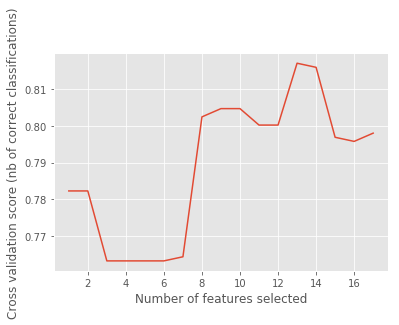

In [149]:
# 評估模型

# 0. 到底要選幾個變數才好
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(trainning_features_X, trainning_target_Y)
print("Optimal number of features : %d" % rfecv.n_features_)
print("RFECV判斷過後，選 %s 個 變數 讓模型表現最好" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

feature_importances_ : 
[ 0.10470521  0.09884643  0.12909034  0.06352024  0.01516698  0.02613629
  0.1502203   0.03321578  0.00300672  0.10942815  0.10552347  0.01026601
  0.00913507  0.0132335   0.03861888  0.01783887  0.07204776]
 
Features sorted by their score:
(0.15022029749999999, 'Title_Mr')
(0.129090338, 'Fare')
(0.1094281518, 'Sex_female')
(0.1055234717, 'Sex_male')
(0.1047052148, 'PassengerId')
(0.098846425200000004, 'Age')
(0.072047758899999995, 'Pclass_3')
(0.063520239300000003, 'family_size')
(0.0386188825, 'Pclass_1')
(0.033215780899999998, 'Title_Mrs')
(0.026136290699999998, 'Title_Miss')
(0.017838870499999999, 'Pclass_2')
(0.0151669783, 'Title_Master')
(0.0132334988, 'Embarked_S')
(0.010266007400000001, 'Embarked_C')
(0.0091350695000000006, 'Embarked_Q')
(0.0030067242000000002, 'Title_Officer')


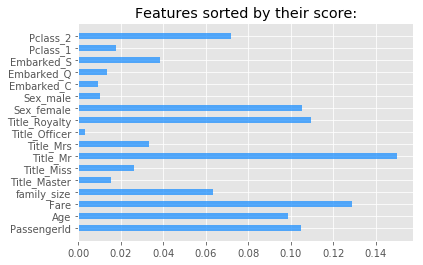



accuracy = 0.918070 


In [150]:
# 1. feature_importances_
print("feature_importances_ : \n%s\n " % (forest_clf.feature_importances_))

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
#Load the dataset
names = train_copied.columns
rfecv.fit(trainning_features_X, trainning_target_Y)
print("Features sorted by their score:")

a = sorted(zip(map(lambda x: round(x, 10), forest_clf.feature_importances_), names), reverse=True)
ind = np.arange(0, len(list(a)), 1)
for i in ind :
    print(a[i])

# bar plot the  feature_importances_
import numpy as np
import matplotlib.pyplot as plt


width = 0.5
plt.barh(ind, forest_clf.feature_importances_, width, facecolor = "dodgerblue", align='center', alpha = 0.75)
plt.title("Features sorted by their score:")

plt.yticks(ind, ["PassengerId", "Age", "Fare","family_size", "Title_Master", "Title_Miss", "Title_Mr", "Title_Mrs", "Title_Officer", "Title_Royalty", "Sex_female", "Sex_male", "Embarked_C",  "Embarked_Q", "Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3"])
# plt.yticks(ind, train_copied.columns)

ax = plt.gca()
plt.show()    

print("\n")

# 2. accuracy
print("accuracy = %f " % (forest_clf.score(trainning_features_X, trainning_target_Y)))


# 第四步 整理test data

對於test data也要做和train data一樣的事情 :

- 了解資料外觀


- 資料預處理

 (1) 填補遺漏值
 
 (2) 新增變數

 (3) one hot encoding 進行類別標籤編碼轉換

In [151]:
# 載入預測資料
test = pd.read_csv("https://storage.googleapis.com/py_ml_datasets/test.csv")

In [152]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [153]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [154]:
test.shape

(418, 11)

In [155]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [156]:
# 分組準備

def get_titles():

    global test
    
    # we extract the title from each name
    test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    # 'Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir' -> 'Mr'
    # 'the Countess', 'Mme', 'Lady', 'Dona' -> 'Mrs'
    # 'Mlle', 'Ms' -> 'Miss'
    
    Title_Dictionary = {
                        "Capt":       "Mr",
                        "Col":        "Mr",
                        "Major":      "Mr",
                        "Jonkheer":   "Mr",
                        "Don":        "Mr",
                        "Sir" :       "Mr",
                        "Dr":         "Officer",
                        "Rev":        "Mr",
                        "the Countess":"Mrs",
                        "Dona":       "Mrs",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Mrs"

                        }
    
    # we map each title
    test['Title'] = test.Title.map(Title_Dictionary)

get_titles()

In [157]:
test_grouped_sex_pclass_title = test.groupby(['Sex','Pclass','Title'])
test_grouped_sex_pclass_title.median()

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss          1074.0  32.0    0.0    0.0  158.20835
              Mrs           1093.0  48.0    1.0    0.0   69.82500
       2      Miss          1121.0  19.5    1.0    1.0   24.50000
              Mrs           1123.5  29.0    0.0    0.0   26.00000
       3      Miss          1090.5  22.0    0.0    0.0    7.87920
              Mrs           1048.0  28.0    1.0    0.5   14.28125
male   1      Master        1022.0   9.5    1.0    2.0  198.43750
              Mr            1095.5  42.0    0.0    0.0   50.24790
              Officer       1185.0  53.0    1.0    1.0   81.85830
       2      Master        1033.5   5.0    0.5    1.5   27.75000
              Mr            1139.0  29.0    0.0    0.0   13.00000
       3      Master        1173.0   7.0    1.0    1.0   15.24580
              Mr            1101.0  25.0    0.0    0.0    7.85420

In [158]:
# Age 的遺漏值以中位數填補
age_median = test.Age.median()
test.Age = test.Age.fillna(age_median)

In [159]:
print("經過剛剛填補遺漏值之後，Age遺漏值還有 %s 個" % sum(test.Age.isnull()))

經過剛剛填補遺漏值之後，Age遺漏值還有 0 個


In [160]:
# 填補 Fare 遺漏值
fare_median = test.Fare.median()
test.Fare = test.Fare.fillna(fare_median)

In [161]:
print("填補過後，Fare的遺漏值還有%s個" % (sum(test.Fare.isnull())))

填補過後，Fare的遺漏值還有0個


In [162]:
# 3-1. 將 SibSp 與 Parch 相加再加 1（自己）成為 family_size ， 只留下新衍生出的變數
test["family_size"] = test["SibSp"] + test["Parch"] + 1

test.drop('SibSp', axis = 1, inplace = True)
test.drop('Parch', axis = 1, inplace = True)

In [163]:
# 3-2. 衍生出新變數Title

def process_names():
    
    global test
    
    # encoding in dummy variable
    test_titles_dummies = pd.get_dummies(test['Title'], prefix = 'Title') # prefix 即 column name
    test = pd.concat([test, test_titles_dummies], axis = 1)
    
    # removing the title variable
    test.drop('Title', axis = 1, inplace = True)

process_names()

In [164]:
# 3-3. 捨棄變數 Cabin (遺漏值過多)
test.drop('Cabin', axis = 1, inplace = True)

In [165]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Fare             0
Embarked         0
family_size      0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
dtype: int64

In [166]:
# 3-2. 由 One-hot encoding 衍生出新變數 ， 捨棄資料儲存型態仍為 object 的變數

def process_other_one_hot_encoding():
    
    global test
    # we clean the Name variable
    test.drop('Name', axis = 1, inplace = True)
    
    
    # encoding in dummy variable
    test_sex_embarked_dummies = pd.get_dummies(test.loc[:, ["Sex", "Embarked"]]) # prefix 即 column name
    
    # 合併新增且整理過變數的DataFrame
    test =  pd.concat([test, test_sex_embarked_dummies], axis = 1)
    
    
    # removing the "object" variable
    test.drop('Sex', axis = 1, inplace = True)
    test.drop('Embarked', axis = 1, inplace = True)
    test.drop('Ticket', axis = 1, inplace = True)

process_other_one_hot_encoding()



def process_pclass():
    
    global test
    # encoding into 3 categories:
    test_pclass_dummies = pd.get_dummies(test['Pclass'],prefix="Pclass")
    
    # adding dummy variables
    test = pd.concat([test, test_pclass_dummies],axis=1)
    
    # removing "Pclass"
    
    test.drop('Pclass',axis=1,inplace=True)
    
    
process_pclass()

- feature selection

In [167]:
testing_features_X = test.values

# 第五步 應用預測資料

In [170]:
# 預估
predictions = forest_clf.predict(testing_features_X)
print(predictions)

[0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


# 第六步 上傳

In [171]:
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(predictions, PassengerId, columns = ["Survived"])
print(my_solution.head())
print(my_solution.shape)
my_solution.to_csv("my_20170921_2_solution.csv", index_label = ["PassengerId"])

     Survived
892         0
893         1
894         0
895         0
896         1
(418, 1)


# Public Score : 0.78468